<a href="https://colab.research.google.com/github/Rishav0431/Titanic-Classification/blob/main/cats_v_dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!mkdir ~p ~/.kaggle
!cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘~p’: File exists
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [15]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:13<00:00, 134MB/s]
100% 1.06G/1.06G [00:13<00:00, 87.4MB/s]


In [16]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [28]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [29]:


# generators

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)

)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)

)



Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [30]:
# Normalise
def process(image,label):
    image= tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [31]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))





In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [33]:
model.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [34]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 73s 110ms/step - loss: 1.3014 - accuracy: 0.5969 - val_loss: 0.6274 - val_accuracy: 0.6418
Epoch 2/10
625/625 [==============================] - 65s 103ms/step - loss: 0.5543 - accuracy: 0.7128 - val_loss: 0.5075 - val_accuracy: 0.7504
Epoch 3/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4757 - accuracy: 0.7734 - val_loss: 0.9048 - val_accuracy: 0.7440
Epoch 4/10
625/625 [==============================] - 67s 106ms/step - loss: 0.4835 - accuracy: 0.7762 - val_loss: 0.5676 - val_accuracy: 0.7470
Epoch 5/10
625/625 [==============================] - 66s 104ms/step - loss: 0.3794 - accuracy: 0.8299 - val_loss: 0.6312 - val_accuracy: 0.7436
Epoch 6/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3322 - accuracy: 0.8551 - val_loss: 0.5448 - val_accuracy: 0.7882
Epoch 7/10
625/625 [==============================] - 67s 106ms/step - loss: 0.2529 - accuracy: 0.8946 - val_loss: 0.8992 - val_ac

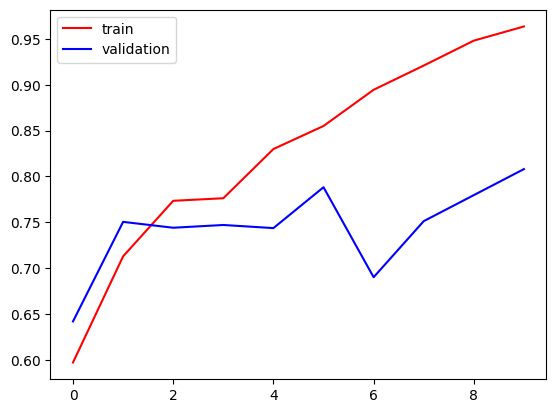

In [35]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

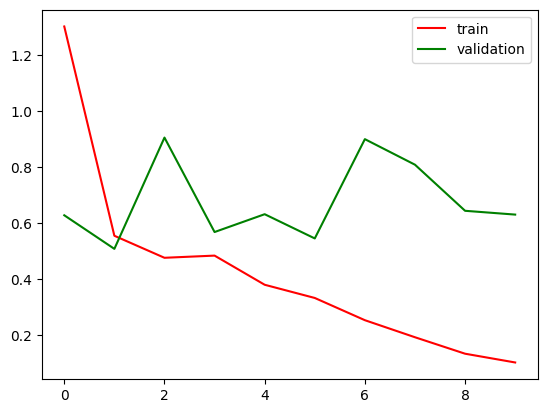

In [36]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='green',label='validation')
plt.legend()
plt.show()

In [ ]:
# Ways to reduce overfitting

#add more data
#Data Augmentation -> next video
#L1/L2 Regulazier
#Batch Norm
#Reduce complexity